In [ ]:
pip install play-scraper

     |████████████████████████████████| 61kB 3.9MB/s 
     |████████████████████████████████| 3.2MB 8.6MB/s 
  Created wheel for requests-futures: filename=requests_futures-1.0.0-cp37-none-any.whl size=7028 sha256=d8248e8609d2513dcdcdc2631a63055f15443df416ba9567949c322c47940f53
  Stored in directory: /root/.cache/pip/wheels/26/d0/f5/dc4e4a37bbe55c9acf967d2bd899152412c1e49c227f5395ff
Successfully built requests-futures


In [ ]:
pip install community

In [ ]:
pip install python-louvain

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
import gensim
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
import csv
import play_scraper
from itertools import combinations
import community
import matplotlib.cm as cm
from community import community_louvain

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
g = nx.read_edgelist("final_file_stfuanduseit.txt",create_using=nx.Graph())


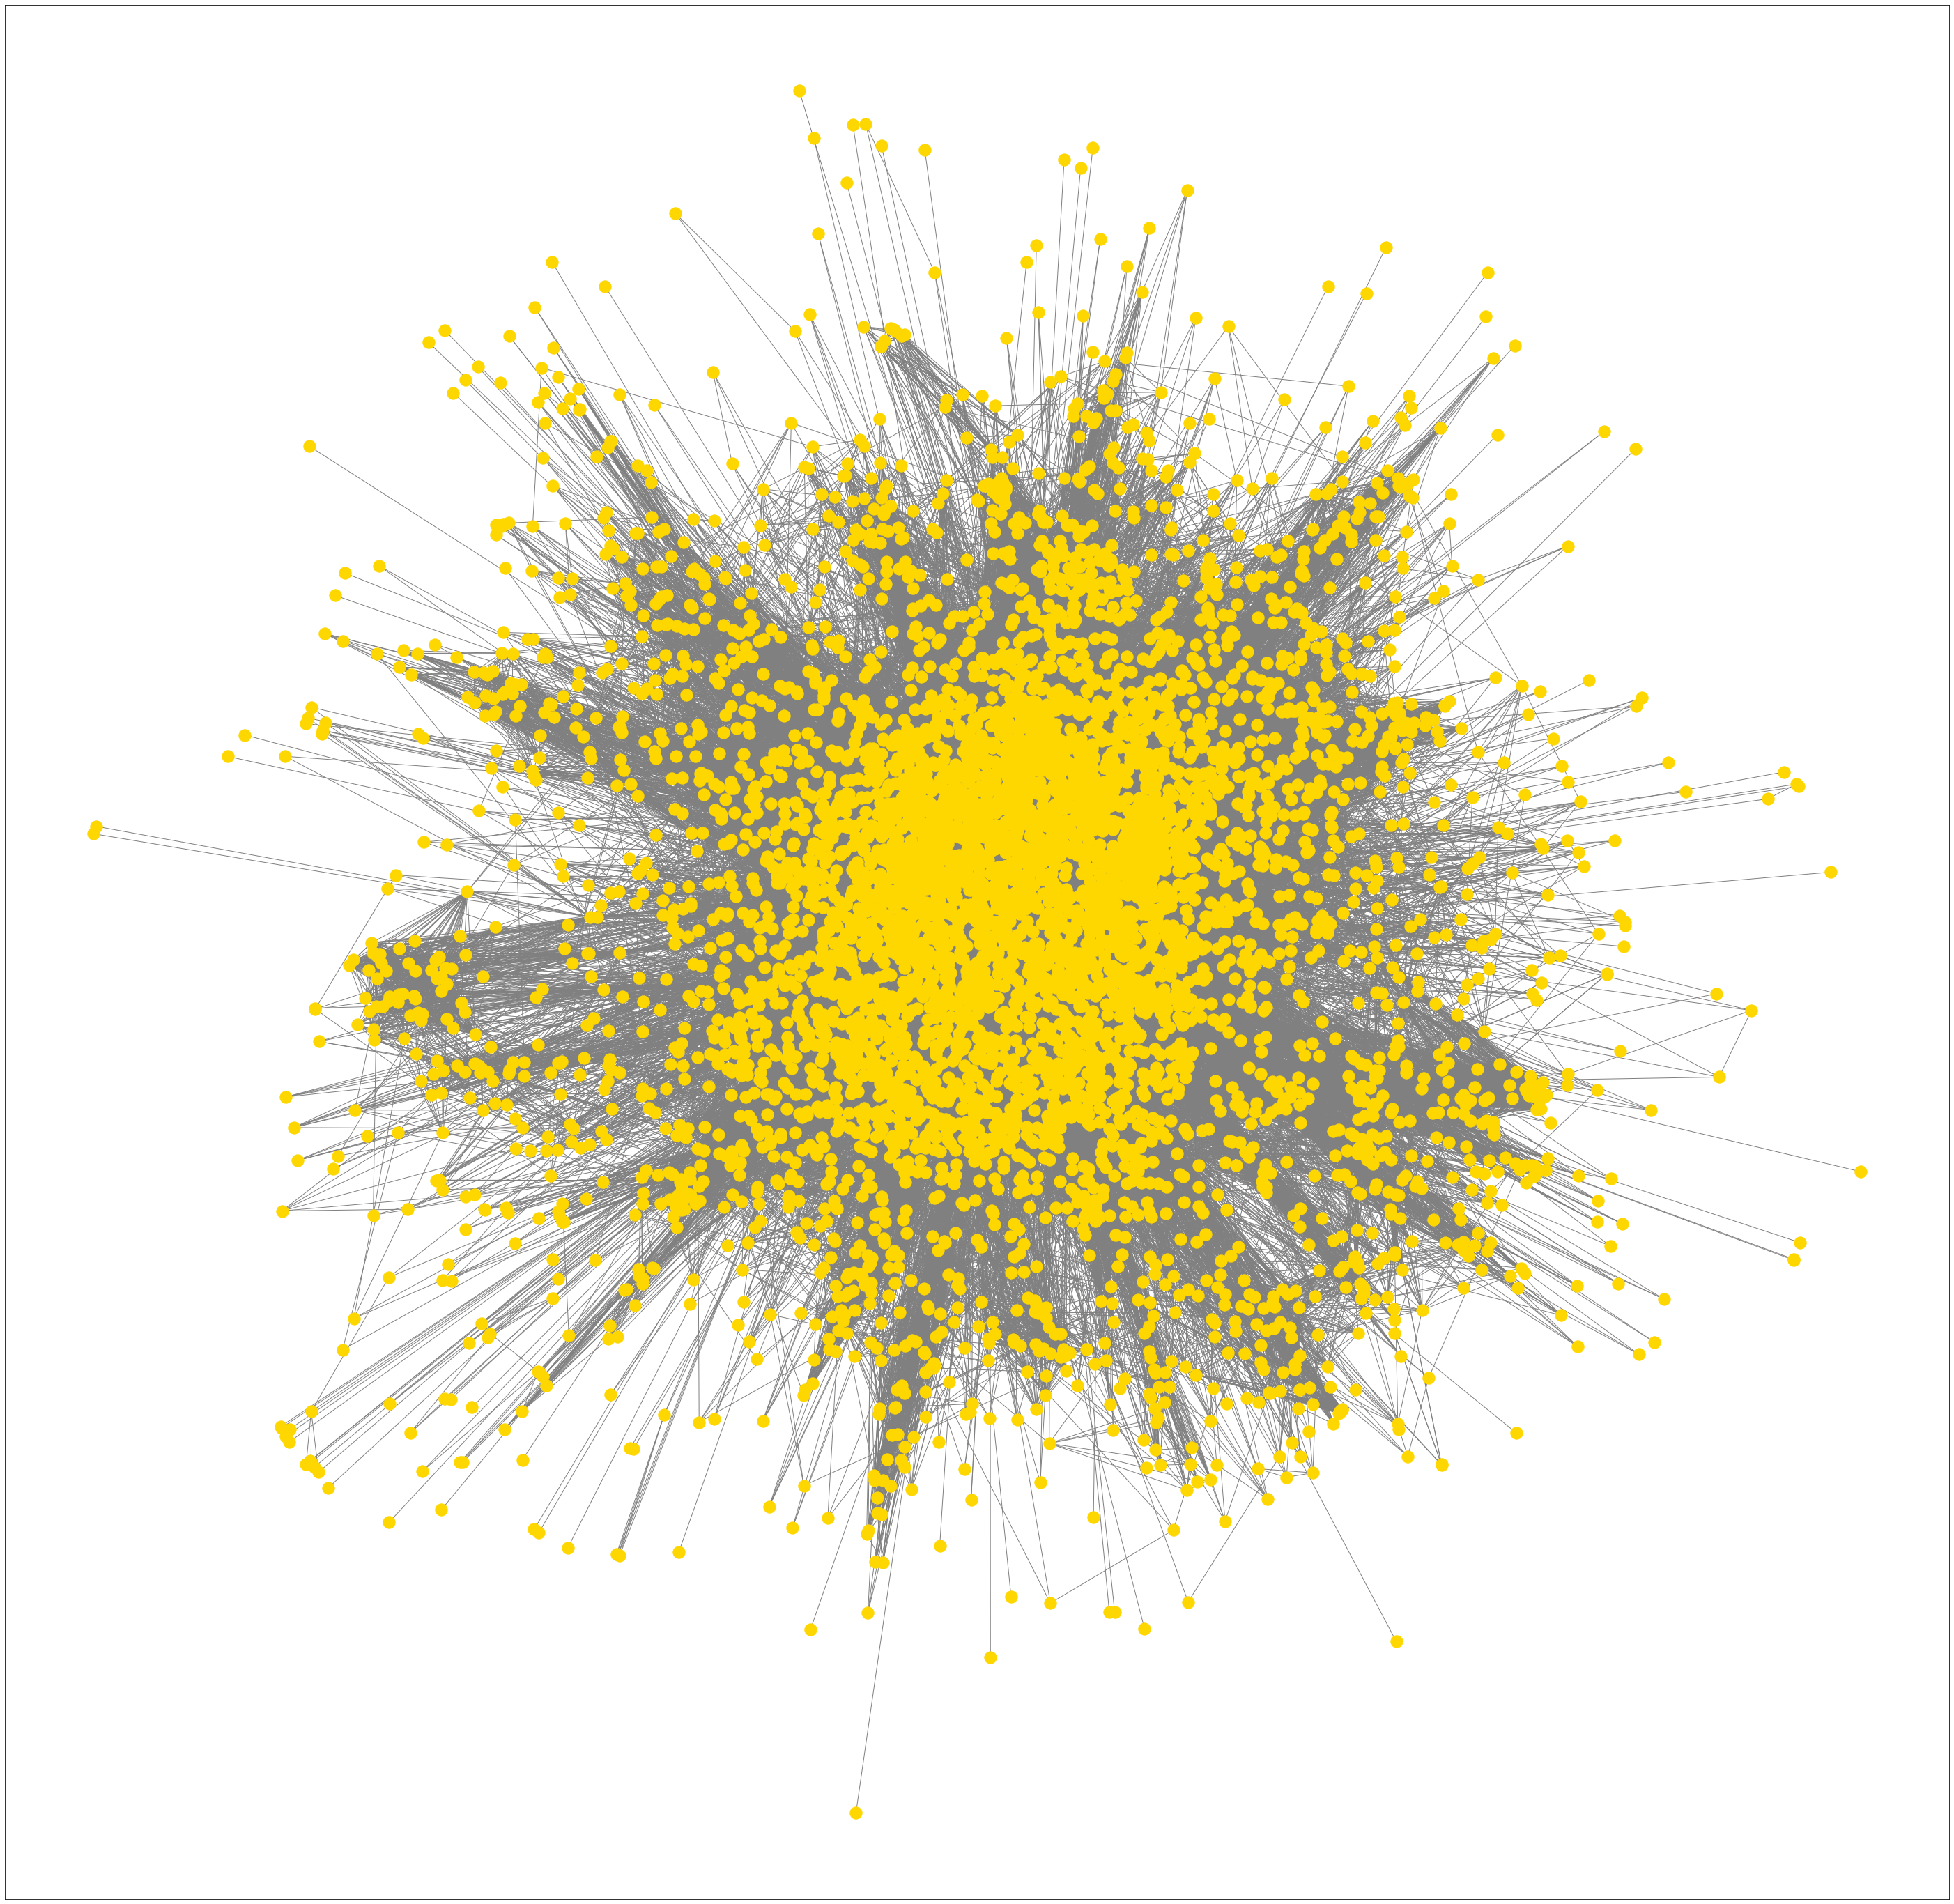

In [ ]:
plt.figure(figsize = (50,50))
nx.draw_networkx(g, edge_color = 'grey',with_labels =False, node_color ='gold')

In [ ]:
a = nx.degree_centrality(g)
a = sorted(a.items(), key=lambda a: a[1])
a.reverse()
print(a)

[('com.epicactiononline.ffxv.ane', 0.29643400371810036), ('com.google.android.apps.helprtc', 0.2807165793476424), ('com.google.android.apps.subscriptions.red', 0.2031434848740916), ('com.halfbrick.monsterdash', 0.180327868852459), ('com.google.android.videos', 0.1762717593375021), ('com.dsi.ant.service.socket', 0.17373669089065402), ('air.com.bitrhymes.bingo', 0.17018759506506675), ('com.hotheadgames.google.free.ks2', 0.16748352205509548), ('com.jiubang.go.music', 0.15092107486902145), ('com.google.android.apps.pixelmigrate', 0.14280885583910766), ('com.epicwaronline.ms', 0.1338516139935778), ('com.google.android.dialer', 0.1333446003042082), ('com.tap4fun.reignofwar', 0.1326685820517154), ('com.google.android.apps.maps', 0.1326685820517154), ('com.machinezone.gow', 0.12979550447862093), ('com.jellybtn.boardkings', 0.12337333107993916), ('com.netease.ko', 0.1216832854487071), ('com.google.android.youtube', 0.11881020787561264), ('com.bethsoft.falloutshelter', 0.11543011661314855), ('co

In [ ]:
print(nx.info(g))

In [ ]:
communities = nx.algorithms.community.centrality.girvan_newman(g)
node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

In [ ]:
c = nx.closeness_centrality(g, u=None, distance=None)
print(c)

In [ ]:
# from community import label_propagatio
from networkx import algorithms
a = nx.algorithms.community.label_propagation.label_propagation_communities(g)
print(list(a))

In [ ]:
part = community_louvain.best_partition(g)
print(len(part))
# print(cmap)
print(part)
values = [part.get(node) for node in g.nodes()]
pos = nx.spring_layout(g)
plt.figure(figsize=(50,50))
cmap = cm.get_cmap('viridis', max(part.values()) + 1)
# print(len(cmap))
nx.draw_networkx(g, cmap = cmap, node_color = values,node_size=200, width=1, edge_color='grey', with_labels=False)
limits=plt.axis('off')

In [ ]:
import networkx.algorithms.community as nx_comm


In [ ]:
max_key = max(part, key=part.get)
all_values = part.values()
max_value = max(all_values)
print(max_key)
print(max_value)

In [ ]:
new_dict = {}
for pair in part.items():
    if pair[1] not in new_dict.keys():
        new_dict[pair[1]] = []

    new_dict[pair[1]].append(pair[0])

print(new_dict)

In [ ]:
h = list(new_dict.values())
mod_mea = nx_comm.modularity(g,h)
print(len(h))
print(mod_mea)


In [ ]:
len(new_dict[0])

In [ ]:
print(new_dict[1])

In [ ]:
def Findmaxnmin(lst):
    maxList = max(lst, key = len)
    maxLength = max(map(len, lst))
    minlist = min(lst, key=len)
    minlen = min(map(len,lst))
    return maxList, maxLength,minlist,minlen
maxli,maxl,minlis,minl = Findmaxnmin(list(new_dict.values()))
print(maxli,'\n',maxl,'\n',minlis,'\n',minl)

In [ ]:
pip install google-play-scraper

In [ ]:
from google_play_scraper import app
gen_cat = []
same_cat_apps = []
for i in minlis:
  j = app(i)
  # print(i)
  j = j['genre']
  if(j == 'Arcade'):
    same_cat_apps.append(i)

  gen_cat.append(j)

same_cat_apps_max = []
for i in maxli:
  try:
   j = app(i)
   j = j['genre']
  except Exception:
   pass
  if(j == 'Arcade'):
    same_cat_apps_max.append(i)
print(same_cat_apps)
print(same_cat_apps_max)
print(len(gen_cat))

In [ ]:
pip install gensim

In [ ]:
from google_play_scraper import app
def get_similarity(a,b):
  # exp = play_scraper.details(a)
  # exp1 = play_scraper.details(b)

  exp = app(a)
  exp1 = app(b)

  des_coc = exp['description']
  des_ebp = exp1['description']
  # print(exp['description'])
  file_docs = []
  tokens = sent_tokenize(des_coc)
  for line in tokens:
    file_docs.append(line)
  # print("Number of documents:",len(file_docs))
  gen_docs = [[w.lower() for w in word_tokenize(text)] for text in file_docs]
  dictionary = gensim.corpora.Dictionary(gen_docs)
  corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]
  tf_idf = gensim.models.TfidfModel(corpus)
  for doc in tf_idf[corpus]:
    # print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc]
    sims = gensim.similarities.Similarity('workdir/',tf_idf[corpus],num_features=len(dictionary))

  tokens = sent_tokenize(des_ebp)
  file2_docs = []
  for line in tokens:
        file2_docs.append(line)

  avg_sims = []
  for line in file2_docs:
        # tokenize words
        query_doc = [w.lower() for w in word_tokenize(line)]
        # create bag of words
        query_doc_bow = dictionary.doc2bow(query_doc)
        # find similarity for each document
        query_doc_tf_idf = tf_idf[query_doc_bow]
        # print (document_number, document_similarity)
        # calculate sum of similarities for each query doc
        sum_of_sims =(np.sum(sims[query_doc_tf_idf], dtype=np.float32))
        # calculate average of similarity for each query doc
        avg = sum_of_sims / len(file_docs)
        # print average of similarity for each query doc
        # add average values into array
        avg_sims.append(avg)
  # calculate total average
  total_avg = np.sum(avg_sims, dtype=np.float)
  # round the value and multiply by 100 to format it as percentage
  percentage_of_similarity = round(float(total_avg) * 100)
  # if percentage is greater than 100
  # that means documents are almost same
  # print("percentage of similarity = ",percentage_of_similarity)
  # if percentage_of_similarity >= 100:
  #   percentage_of_similarity = 100

  return percentage_of_similarity

In [ ]:
l = same_cat_apps
k = same_cat_apps_max
for i in l:
  for j in k:
    similarity = get_similarity(i,j)
    print(i,j,'----',similarity)

In [ ]:
l = same_cat_apps
k = same_cat_apps_max
for i in range(0,len(l)+1):
    similarity = get_similarity(same_cat_apps[i],same_cat_apps[i+1])
    print(same_cat_apps[i],same_cat_apps[i+1],'----',similarity)

In [ ]:
import networkx.algorithms.community as nx_comm
from networkx.algorithms.community import greedy_modularity_communities
from google_play_scraper import app

c = list(greedy_modularity_communities(g))
# %time
print(len(c))
# for i in c:
plt.rcParams['figure.figsize'] = [50, 50]
pos = nx.spring_layout(g)
cmap = cm.get_cmap('viridis', len(c) + 1)
nx.draw_networkx(g, pos = pos,
                 cmap = cmap, node_color = values,
                 node_size=120, width=1, edge_color='grey', with_labels=False)
limits=plt.axis('off')
plt.show()
m = []
for i in c:
  m.append(list(i))
print(len(m))
mod_mea = nx_comm.modularity(g,m)
print(mod_mea)


In [ ]:
print(c)

In [ ]:
com = []
for i in c:
  com.append(list(i))
print(com)

In [ ]:
def FindMaxLength(lst):
    maxList = max(lst, key = len)
    maxLength = max(map(len, lst))
    minlist = min(lst, key=len)
    minlen = min(map(len,lst))
    return maxList, maxLength,minlist,minlen

# Driver Code
# lst = [['A'], ['A', 'B'], ['A', 'B', 'C'], ]
maxlist, maxlen,minlist,minlen = FindMaxLength(com)
print(maxlen,minlen)
print(minlist)
min_gen = []
for i in minlist:
  f = app(i)
  f = f['genre']
  min_gen.append(f)
print(min_gen)

In [ ]:
K = g.nodes
hmm = []
for i in K:
  try:
    p = app(i)
    p = p['genre']
    if(p == 'Arcade'):
      hmm.append(i)
  except Exception:
      print("theres no hope")
      pass

In [ ]:
K = g.nodes
adven = []
for i in K:
  try:
    p = app(i)
    p = p['genre']
    if(p == 'Adventure'):
      adven.append(i)
  except Exception:
      print(i)
      print("theres no hope")
      pass

In [ ]:
b = sorted(g.degree, key=lambda x: x[1], reverse=True)
print(b)


In [ ]:
K = g.nodes
prod = []
for i in K:
  try:
    p = app(i)
    p = p['genre']
    if(p == 'Productivity'):
      prod.append(i)
  except Exception:
      print(i)
      print("theres no hope")
      pass

In [ ]:
#all nodes with category Productivity
a4 = g.copy()
for i in L:
  if(i not in prod):
    a4.remove_node(i)
plt.figure(figsize=(30,30))
pos = nx.spring_layout(a4)
nx.draw_networkx(a4, pos =pos,node_color = 'blue',node_size=120, width=1, edge_color='grey', with_labels=False)
plt.show()
# print(a2.nodes)
limits=plt.axis('off')
print(nx.number_connected_components(a4))

In [ ]:
#all nodes with category Adventure
a3 = g.copy()
for i in L:
  if(i not in adven):
    a3.remove_node(i)
plt.figure(figsize=(30,30))
pos = nx.spring_layout(a3)
nx.draw_networkx(a3, pos =pos,node_color = 'blue',node_size=120, width=1, edge_color='grey', with_labels=False)
plt.show()
# print(a2.nodes)
limits=plt.axis('off')
print(nx.number_connected_components(a3))

In [ ]:
#all nodes with category Arcade
a2 = g.copy()
for i in L:
  if(i not in hmm):
    a2.remove_node(i)
plt.figure(figsize=(30,30))
pos = nx.spring_layout(a2)
nx.draw_networkx(a2, pos =pos,node_color = 'blue',node_size=120, width=1, edge_color='grey', with_labels=False)
plt.show()
# print(a2.nodes)
limits=plt.axis('off')

print(nx.number_connected_components(a2))

In [ ]:
# from google_play_scraper import app

apps = []
all_cat = set()
for i in range(0,max_value+1):
   apps = new_dict[i]
   cat = []
   for j in apps:
     try:
        res = app(j)
        res = res['genre']
     except Exception:
        # print(Exception)
        pass
     if(res not in cat):
          cat.append(res)
   all_cat = all_cat|set(cat)
   print(cat)

In [ ]:
print(all_cat)
print(len(all_cat))

In [ ]:
a1 = g.copy()
k = list(new_dict.values())
# print(k)
for h in range(0,max_value):
  if (h == 1):
    continue
  else:
    a1.remove_nodes_from(k[h])
plt.figure(figsize=(50,50))
nx.draw_networkx(a1, node_color = 'blue',node_size=120, width=1, edge_color='grey', with_labels=False)
plt.show()
print(a1.nodes)

In [ ]:
print("1.Number of Connected Components:- ", nx.number_connected_components(g))
bet_centrality = nx.betweenness_centrality(g, normalized = True, endpoints = False)
a = sorted(bet_centrality.items(), key=lambda bet_centrality: bet_centrality[1])
a.reverse()
print("Betweeness Centrality of each node in descending order: ",a)

In [ ]:
close_centrality = nx.closeness_centrality(g)
a = sorted(close_centrality.items(), key=lambda close_centrality: close_centrality[1])
a.reverse()
print("Betweeness Centrality of each node in descending order: ",a)

In [ ]:
# G = nx.read_edgelist("edgelist_top_paid_200.txt",create_using=nx.Graph())
# G = nx.path_graph(4)


In [ ]:
# print(nx.info(gcc))
g_nodes = list(g.nodes())


In [ ]:
print(new_dict)

In [ ]:
pip install requests


In [ ]:
cat_apps = {}
print(app_genre)
for pair in app_genre.items():
    if pair[1] not in cat_apps.keys():
        cat_apps[pair[1]] = []

    cat_apps[pair[1]].append(pair[0])

print(cat_apps)

In [ ]:
for i in cat_apps.keys():
  print(cat_apps[''])

In [ ]:
# largest_cc = max(nx.connected_components(G), key=len)
edge = list(g.edges.data())
gcc = nx.Graph()
largest_cc = max(nx.connected_components(g), key=len)
gcc_edges = []
for i,j in enumerate(edge):
  if(j[0] in largest_cc and j[1] in largest_cc):
     gcc.add_edges_from([edge[i]])
     gcc_edges.append(edge[i])
p = list(gcc.nodes)
plt.figure(figsize = (50,50))
nx.draw_networkx(gcc, with_labels = False, node_color ='yellow',arrows= True)
plt.show()
